In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

载入数据

In [117]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
print('train：',train.shape,'test：',test.shape)

train： (1176, 36) test： (294, 35)


合并训练集和测试集

In [118]:
train['Attrition']=train['Attrition'].map({"Yes":1,"No":0})

In [119]:
data=train.append(test,ignore_index=True,sort=False)
print('合并后的数据集：',data.shape)

合并后的数据集： (1470, 36)


In [120]:
Attrition_1=train[train.Attrition==1]
Attrition_0=train[train.Attrition==0]

观察数据结构

In [121]:
data.head()

,user_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1374,58,0.0,Travel_Rarely,605,Sales,21,3,Life Sciences,1,...,3,80,1,29,2,2,1,0,0,0
1,1092,45,0.0,Travel_Rarely,950,Research & Development,28,3,Technical Degree,1,...,4,80,1,8,3,3,5,4,0,3
2,768,40,0.0,Travel_Rarely,300,Sales,26,3,Marketing,1,...,2,80,1,8,3,2,7,7,7,5
3,569,36,0.0,Non-Travel,1434,Sales,8,4,Life Sciences,1,...,2,80,0,10,1,3,10,7,0,9
4,911,25,1.0,Travel_Frequently,599,Sales,24,1,Life Sciences,1,...,4,80,0,1,4,3,1,0,1,0


In [122]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,1470.0,734.500000,424.496761,0.0,367.25,734.5,1101.75,1469.0
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Attrition,1176.0,0.159864,0.366636,0.0,0.00,0.0,0.00,1.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
user_id                     1470 non-null int64
Age                         1470 non-null int64
Attrition                   1176 non-null float64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus         

删除字段

In [124]:
data.drop(['Over18','StandardHours','EmployeeCount','EmployeeNumber','user_id'],axis=1,inplace=True)

分析数据特征

In [125]:
import seaborn as sns

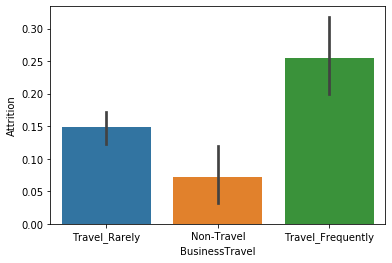

In [126]:
sns.barplot(x="BusinessTravel",y="Attrition",data=train)

哑编码

In [127]:
data=pd.get_dummies(data, columns = ["BusinessTravel"],drop_first=True)

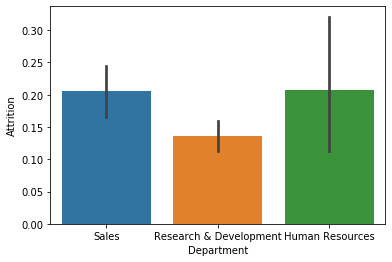

In [128]:
sns.barplot(x="Department",y="Attrition",data=train)

In [129]:
data=pd.get_dummies(data, columns = ["Department"], drop_first=True)

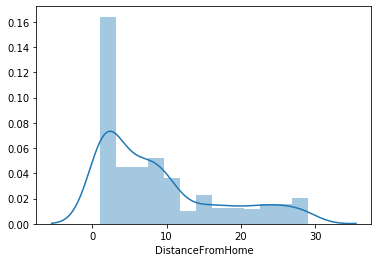

In [130]:
sns.distplot(Attrition_0["DistanceFromHome"])

In [131]:
data = pd.get_dummies(data, columns = ["Education"],drop_first=True)

In [132]:
from scipy.stats import norm

In [133]:
data = pd.get_dummies(data, columns = ["EducationField"], drop_first=True)

In [134]:
data = pd.get_dummies(data, columns = ["EnvironmentSatisfaction"], drop_first=True)

In [135]:
data = pd.get_dummies(data, columns = ["Gender"], drop_first=True)
data = pd.get_dummies(data, columns = ["JobInvolvement"], drop_first=True)
data = pd.get_dummies(data, columns = ["JobRole"], drop_first=True)
data = pd.get_dummies(data, columns = ["MaritalStatus"], drop_first=True)
data = pd.get_dummies(data, columns = ["OverTime"], drop_first=True)
data = pd.get_dummies(data, columns = ["PerformanceRating"], drop_first=True)
data = pd.get_dummies(data, columns = ["RelationshipSatisfaction"], drop_first=True)
data = pd.get_dummies(data, columns = ["StockOptionLevel"], drop_first=True)
data = pd.get_dummies(data, columns = ["TrainingTimesLastYear"], drop_first=True)
data = pd.get_dummies(data, columns = ["WorkLifeBalance"], drop_first=True)

相关性矩阵

In [136]:
corrDf = data.corr()

In [137]:
pd.DataFrame(corrDf['Attrition'].sort_values(ascending =False)).head(30)

,Attrition
Attrition,1.000000
OverTime_Yes,0.225425
JobRole_Sales Representative,0.175908
MaritalStatus_Single,0.169450
BusinessTravel_Travel_Frequently,0.123936
JobRole_Laboratory Technician,0.105588
Department_Sales,0.080562
EducationField_Technical Degree,0.079830
DistanceFromHome,0.072157
EducationField_Marketing,0.069331


In [138]:
tr=data[:1176]
ts=data[1176:]

In [139]:
def minmax(df):
    scaler = MinMaxScaler()
    result=scaler.fit_transform(df)
    w=pd.DataFrame(result)
    w.columns=df.columns
    w.index=df.index
    return w

In [140]:
from sklearn.preprocessing import MinMaxScaler

In [141]:
#原始数据1176行
sourceRow=1176
train_x = data.loc[0:sourceRow-1,:]
train_x=train_x.drop('Attrition',axis=1)
#原始数据标签
train_y = data.loc[0:sourceRow-1,'Attrition']

#预测数据集
test_x = data.loc[sourceRow:,:]
test_x=test_x.drop('Attrition',axis=1)

In [142]:
from sklearn.linear_model import LogisticRegression

In [143]:
lr = LogisticRegression(solver="liblinear")

In [144]:
tn=minmax(train_x)
tt=minmax(test_x)

In [146]:
lr.fit(tn, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [147]:
lr.score(tn,train_y)

0.8903061224489796

In [148]:
ty=lr.predict_proba(tt)

In [149]:
result = pd.DataFrame(columns=["user_id","Attrition"])

In [150]:
result["Attrition"]=pd.DataFrame(ty)[1].values
result["user_id"]=test.user_id.values

In [151]:
result.to_csv('sampleSubmission_9.csv',index=None)